# Building an Image Classifier

Today we are going to implement a simple neural network in order to classify and distinguish between handwritten digits. In other words, we are implementing an image classifier. The total structure of the classifier that we are going to build is shown in the following image. As simple as that!

We will use MNIST, a very famouse dataset which contains 55000 images of digits with their labels for training and also, 10,000 more images for testing. At the end, our simple classifier will be able to classify images with the accuracy of around 92%!

I will show you and explain to you step by step what we are going to do and the reason behind that. You can press the Run button to run each step and move on to the next one. If you are courious and when it is possible, you can change some values to see their effect on the performance and running time (values of the variables that have CAPITAL names). Codes are written for Python 3, with the assumption that you already have installed Tensorflow on your computer. 

What we are doing today is based on a tutorial presented on the Tensorflow's webpage:
https://www.tensorflow.org/versions/r1.0/get_started/mnist/beginners

I also used some of the helpful functions that were written on this very interesting blog post by Justin Francis:
https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow


<img src="Images/Total_Network.png">

## Loading Libraries

Before anything, let's bring some libraries that we need for plotting the results and of course for calculating them.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Loading MNIST Dataset

Our goal for today is to create a neural network image classifier that is capable of classifying handwritten digits. So the first step would be to have a dataset of handwritten digits. MNIST is a very famous dataset that contains more than 60K images along with their labels. They divided the images into two parts, 55,000 images for training and 10,000 images for testing the performance of the classifier. Each image is labeled by a person and that's our ground truth. All the labels are also included in the dataset. Images are 28\*28 pixels.

<img src="Images/mnist_plot-800x600.png">

Let's load the MNIST dataset.
This may take a while especially the first time since it has to download the Dataset from the internet first. You will see some warnings that you can ignore...

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Defining some functions for displaying the digits and flattening them

We need to define some simple functions for flattening and displaying the data. 

The function display_digit() will pick a random image from the MNIST Train dataset and will show it along with it's label.

The function display_mult_flat(batch_size) will pick a random subset of images from the MNIST Train dataset, with the size of batch_size. It will then flatten each 28\*28 image to a 1\*784 wide image and show all of them at once. More details about image flattening will be explained later.

In [3]:
# def display_digit(num):
def display_digit():
    x_train, y_train = mnist.train.next_batch(1)
    print(y_train)
    label = y_train.argmax(axis=1)
    image = x_train.reshape([28,28])
    plt.title('Example Label: ' +  str(label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(batch_size):
    x_train, y_train = mnist.train.next_batch(batch_size)
    images = x_train[0].reshape([1,784])
    for i in range(1, batch_size):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

Let's see a random image from the MNIST Train Folder and its label...

The labe is in the hot-vector format, which means since each digit can be between 0-9, each lable is a list with the length of 10, all members are zero except the one representing the true number. 

For example, if the image is showing a '9', its label will be: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], and if the image is showing a '3', its label will be: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


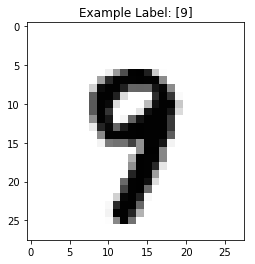

In [10]:
# display_digit(ran.randint(0, x_train.shape[0]))
display_digit()

## Training a Neural Network Model

Here is how a neural network model will be trained in layman terms. We show the model a bunch of images, it will make some random guesses the first time and produce some results (that will probably be garbage). It will then compare the results with the ground truth labels of those images and realize how bad the results are. It will then modify itself in a way to have a better guesses next time. We then show it another bunch of images. The model will guess some results, but since it already has seen some images, this time it will have a better guess. Then again, it will compare its results with the labels. It will continue this cycle for a while, or until its performance would not change anymore.

Training a neural network model is like showing someone who does not know about Marvel superheroes a collection of superhero images. At first, the guy does not know the name of superheroes, and his guesses can be completely irrelavant.



<img src="Images/First_Guess.png">

Then we show hime where he is wrong and what is their right names. Then he would say that he understood, but probably not entirely... Next time we show him some new images and he will guess the names again.

<img src="Images/Second_Guess.png">

Not bad, he got some names right. But there is still room for improvement. We let him know where he was wrong and what is the right name. Then again, we will test him with more images of superheroes...

<img src="Images/Third_Guess.png">

Finally! He got them all right :)

That's exactly how the training works. We will give it random image batches several times and everytime it will improve its results.

## Image Flatenning

Now that we have MNIST images ready, we can give them to the model as input. Each image is gray (not RGB) with the width and height of 28\*28. Each pixel values is in range of [0, 255] where 0 means black and 255 means white. We need to make each image flat in order to feed it to the neural network. Therefore by flattening each image, we will have a vector with size of 1\*784.


<img src="Images/Image_Flattening.png">

Every time we feed the model with several image altogether. We call this package of images a batch. 
In the following piece of code, you can see a picture of a batch of random flatted images. We have 784 columns and each row represents one image. You can change the batch size (number of rows) to see how it changes the picture.

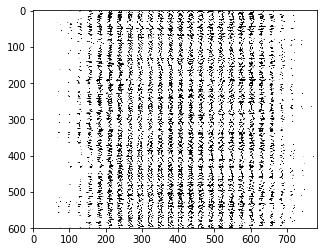

In [8]:
BATCH_SIZE = 600
display_mult_flat(BATCH_SIZE)

Until this point, we actually have not been using TensorFlow at all. The next step is importing TensorFlow and defining our session. TensorFlow, in a sense, creates a directed acyclic graph (flow chart) which you later feed with data and run in a session:

## Construct the model with Tensorflow

AFter loading the MNIST images and now that we figured out how we want to feed the images to the model, now it is time to construct the actual neural network model. In order to do that we need to work with Google Tensorflow. Tensorflow is an application for working with graphes, i.e. nodes and edges. Let's load the Tensorflow and start it.


In [14]:
import tensorflow as tf
sess = tf.Session()

The model that we have in mind is very simple and you can see its design in the following picture. 
Assuming that we want to feed only one image to the model for now, the input of our model contains 784 nodes, each representing one pixel of the image, and the output has 10 nodes, representing 10 digits. Input nodes are shown with green color and output nodes are shown with red. I will talk about the blue nodes later. Each red node represents one number. Based on the values of the green nodes, each red node will have a different score/value. For each image, we want its represented node to have the highest score among the others. For example, if the image represents an '8' we would like the ninth node to have the highest score (first node is the representative of number zero).

Score of each red node will be calculating based on the effect of each pixel. For each red node, we want pixels (green nodes) that show the number in the input image to be more important and have higher effect. This way, the score of that node will be higher. This can be done by using the yellow weigths. As you can see, W is a table 784\*10 and each member of this matrix represnets the importance of that pixel to that number final result. For example, the node in row 12 and column 5 shows us how much the 12th pixels is important in recognizing images of number 4 (first red node represents number zero).


<img src="Images/Model_Details.png">

We define X and Y_ as placeholders as they are the only thing we have now and we will get from the MNIST dataset...

When we assign None to our placeholder, it means the placeholder can be fed as many examples as you want to give it. In this case, our placeholder can be fed any multitude of 784-sized values.

We then define y_, which will be used to feed y_train into. This will be used later so we can compare the ground truths to our predictions. We can also think of our labels as classes:

In [15]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Next, we will define the weights W and bias b. These two values are the grunt workers of the classifier—they will be the only values we will need to calculate our prediction after the classifier is trained.

We will first set our weight and bias values to zeros because TensorFlow will optimize these values later. Notice how our W is a collection of 784 values for each of the 10 classes:

In [16]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

We will now define y, which is our classifier function. This particular classifier is also known as multinomial logistic regression. We make our prediction by multiplying each flattened digit by our weight and then adding our bias:

In [17]:
y = tf.nn.softmax(tf.matmul(x,W) + b)

That tells us what y is in our session, but what if we want the values of y? You cannot just print a TensorFlow graph object to get its values; you must run an appropriate session in which you feed it data. So, let’s feed our classifier three examples and see what it predicts. In order to run a function in our session, we first must initialize the variables in our session. Notice if you just run sess.run(y) TensorFlow will complain that you need to feed it data:

In [18]:
batch_size = 7
x_train, y_train = mnist.train.next_batch(batch_size)
sess.run(tf.global_variables_initializer())
print(sess.run(y, feed_dict={x: x_train}))

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


# Talk about the Softmax in here..

So, here we can see our prediction for our first three training examples. Of course, our classifier knows nothing at this point, so it outputs an equal 10% probability of our training examples for each possible class.

But how did TensorFlow know the probabilities, you might ask; it learned the probabilities by calculating the softmax of our results. The Softmax function takes a set of values and forces their sum to equal one, which will give probabilities for each value. Any softmax value will always be greater than zero and less than one. Still confused? Try running this or read up on what softmax is doing mathematically:

In [12]:
test_result_1 = tf.nn.softmax(tf.zeros([4]))
sess.run(test_result_1)

array([0.25, 0.25, 0.25, 0.25], dtype=float32)

In [19]:
test_result_2 = tf.nn.softmax(tf.constant([0.1, 0.005, 2, 0.1, 0.005, 2, 0.1, 0.005, 2, 0.3]))
sess.run(test_result_2)

array([0.03702715, 0.03367149, 0.24755964, 0.03702715, 0.03367149,
       0.24755964, 0.03702715, 0.03367149, 0.24755964, 0.04522507],
      dtype=float32)

## Comparing the results with ground truth labels

<img src="Images/Comparing_Results.png">

## Loss function (Cross Entropy)
Next, we will create our cross_entropy function, also known as a loss or cost function. It measures how good (or bad) of a job we are doing at classifying. The higher the cost, the higher the level of inaccuracy. It calculates accuracy by comparing the true values from y_train to the results of our prediction y for each example. The goal is to minimize your loss:

In [14]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

This function is taking the log of all our predictions y (whose values range from 0 to 1) and element wise multiplying by the example’s true value y_. If the log function for each value is close to zero, it will make the value a large negative number (i.e., -np.log(0.01) = 4.6), and if it is close to 1, it will make the value a small negative number (i.e., -np.log(0.99) = 0.1).

We are essentially penalizing the classifier with a very large number if the prediction is confidently incorrect and a very small number if the prediction is confidendently correct.

Here is a simple made up python example of a softmax prediction that is very confident that the digit is a 3:

In [15]:
predicted_result = [0.03, 0.03, 0.01, 0.9, 0.01, 0.01, 0.0025,0.0025, 0.0025, 0.0025]

In [16]:
test_label_1 = [0,0,0,1,0,0,0,0,0,0]
test_label_2 = [0,0,0,0,0,0,0,0,0,1]

In [17]:
cross_entropy_1 = np.sum(-np.multiply(test_label_1, np.log(predicted_result)))
cross_entropy_2 = np.sum(-np.multiply(test_label_2, np.log(predicted_result)))

In [18]:
print('cross_entropy_1 (correct prediction): ' + str(cross_entropy_1))
print('cross_entropy_2 (wrong prediction): ' + str(cross_entropy_2))

cross_entropy_1 (correct prediction): 0.10536051565782628
cross_entropy_2 (wrong prediction): 5.991464547107982


Now, our cross_entropy function gives us 4.6051, which shows a heavily penalized, poorly made prediction. It was heavily penalized due to the fact the classifier was very confident that it was a 3 when it actually was a 2.

Next we begin to train our classifier. In order to train, we have to develop appropriate values for W and b that will give us the lowest possible loss.

Below is where we can now assign custom variables for training if we wish. Any value that is in all caps below is designed to be changed and messed with. In fact, I encourage it! First, use these values, then later notice what happens when you use too few training examples or too high or low of a learning rate.

If you set TRAIN_SIZE to a large number, be prepared to wait for a while. At any point, you can re run all the code starting from here and try different values:

We can now initialize all variables so that they can be used by our TensorFlow graph:

In [20]:
TRAIN_STEPS = 2500
train_batch_size = 100
test_batch_size = 2000
LEARNING_RATE = 0.1


Now, we need to train our classifier using gradient descent. We first define our training method and some variables for measuring our accuracy. The variable training will perform the gradient descent optimizer with a chosen LEARNING_RATE in order to try to minimize our loss function cross_entropy:

In [21]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

We can now initialize the TensorFlow graph:

In [22]:
init = tf.global_variables_initializer()
sess.run(init)

Now, we’ll define a loop that repeats TRAIN_STEPS times; for each loop, it runs training, feeding in values from x_train and y_train using feed_dict. In order to calculate accuracy, it will run accuracy to classify the unseen data in x_test by comparing its y and y_test. It is vitally important that our test data was unseen and not used for training data. If a teacher were to give students a practice exam and use that same exam for the final exam, you would have a very biased measure of students’ knowledge:

In [23]:
weight = sess.run(W)
W_List = [weight]
for i in range(TRAIN_STEPS+1):
    x_train, y_train = mnist.train.next_batch(train_batch_size)
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        x_test, y_test = mnist.test.next_batch(test_batch_size)
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))
        weight = sess.run(W)
        W_List.append(weight)

Training Step:0  Accuracy =  0.362  Loss = 2.1368113
Training Step:10  Accuracy =  0.718  Loss = 1.5191699
Training Step:20  Accuracy =  0.7835  Loss = 1.0710753
Training Step:30  Accuracy =  0.823  Loss = 0.9446838
Training Step:40  Accuracy =  0.8325  Loss = 0.8275247
Training Step:50  Accuracy =  0.8465  Loss = 0.8475421
Training Step:60  Accuracy =  0.8385  Loss = 0.68297076
Training Step:70  Accuracy =  0.852  Loss = 0.549088
Training Step:80  Accuracy =  0.8595  Loss = 0.7113577
Training Step:90  Accuracy =  0.8585  Loss = 0.70765746
Training Step:100  Accuracy =  0.867  Loss = 0.5531646
Training Step:110  Accuracy =  0.87  Loss = 0.6367939
Training Step:120  Accuracy =  0.8775  Loss = 0.61364
Training Step:130  Accuracy =  0.8775  Loss = 0.5189894
Training Step:140  Accuracy =  0.876  Loss = 0.4069353
Training Step:150  Accuracy =  0.8775  Loss = 0.4351709
Training Step:160  Accuracy =  0.8735  Loss = 0.55000573
Training Step:170  Accuracy =  0.8755  Loss = 0.5164492
Training St

Training Step:1510  Accuracy =  0.924  Loss = 0.29439342
Training Step:1520  Accuracy =  0.914  Loss = 0.36474445
Training Step:1530  Accuracy =  0.9075  Loss = 0.47787365
Training Step:1540  Accuracy =  0.9055  Loss = 0.3374785
Training Step:1550  Accuracy =  0.914  Loss = 0.36752358
Training Step:1560  Accuracy =  0.914  Loss = 0.27583528
Training Step:1570  Accuracy =  0.9155  Loss = 0.32528043
Training Step:1580  Accuracy =  0.9075  Loss = 0.4769312
Training Step:1590  Accuracy =  0.9235  Loss = 0.35241708
Training Step:1600  Accuracy =  0.917  Loss = 0.36667085
Training Step:1610  Accuracy =  0.92  Loss = 0.22249578
Training Step:1620  Accuracy =  0.916  Loss = 0.23465212
Training Step:1630  Accuracy =  0.908  Loss = 0.2402666
Training Step:1640  Accuracy =  0.911  Loss = 0.20510522
Training Step:1650  Accuracy =  0.907  Loss = 0.19952789
Training Step:1660  Accuracy =  0.917  Loss = 0.36743954
Training Step:1670  Accuracy =  0.9065  Loss = 0.19600806
Training Step:1680  Accuracy 

Now let's see the weights evolution

In [24]:
def showItAll(number_of_Iterations, W_List):
    w=28
    h=28
    fig=plt.figure(figsize=(28, 28))
    columns = 10
    rows = number_of_Iterations
    for row_index in range(number_of_Iterations):
        temp_W = W_List[row_index]
        for col_index in range (10):
            weight = temp_W[:,col_index]
            img = weight.reshape([28,28])
            i = 10*row_index + col_index + 1
            fig.add_subplot(rows, columns, i)
            plt.imshow(img, cmap=plt.get_cmap('seismic'))
    plt.show()

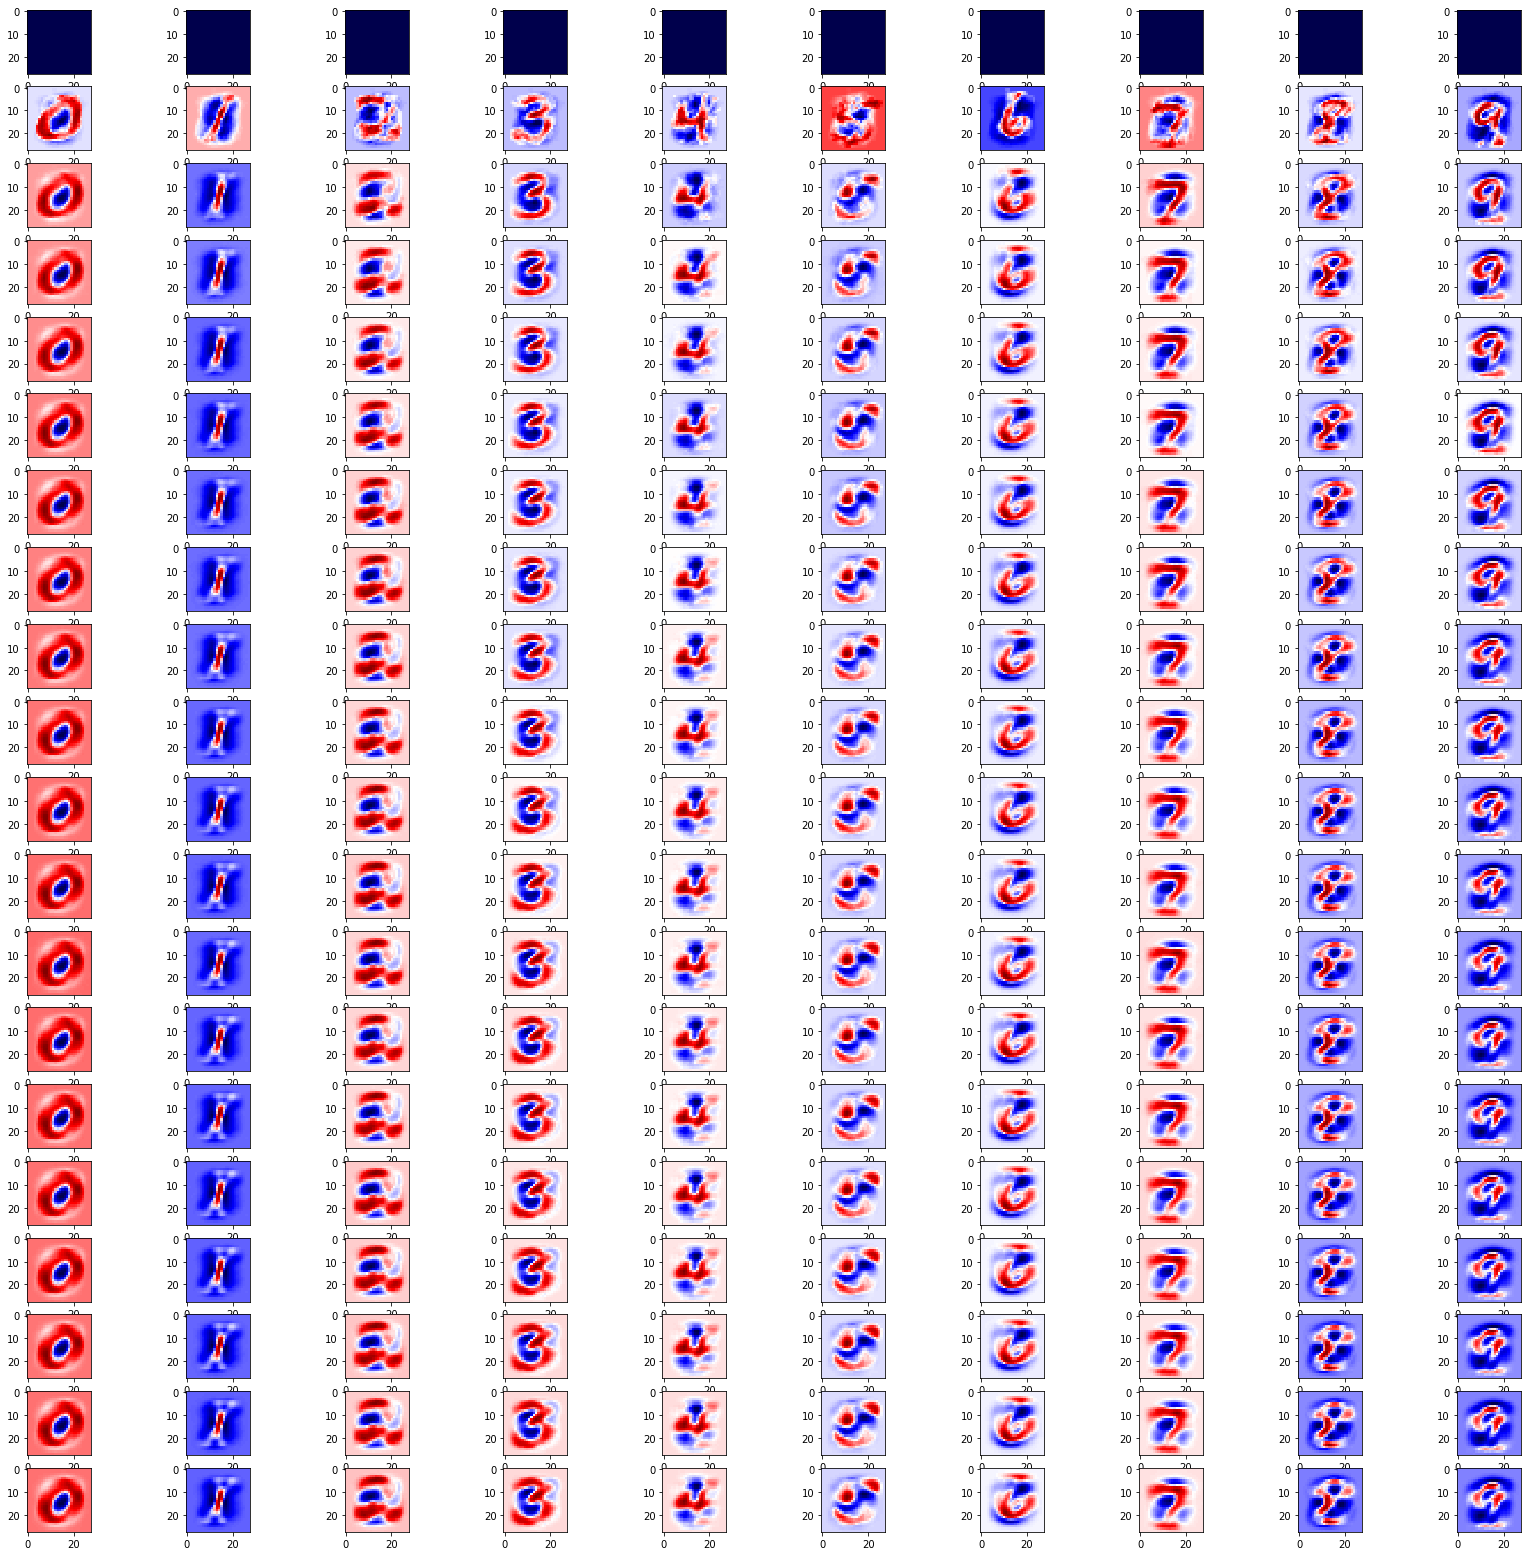

In [25]:
number_of_Iterations = 20
showItAll(number_of_Iterations, W_List)

Now, let's try it on some new random images from the test dataset:

In [26]:
resultTable = tf.placeholder(tf.float32, shape=[None, 10])
final_result = tf.argmax(resultTable,1)
def readable_results(rawTable):
    return(sess.run(final_result, feed_dict={resultTable: rawTable}))
    
    

In [33]:
final_test_batch_size = 25
x_test, y_test = mnist.test.next_batch(final_test_batch_size)
# y = tf.nn.softmax(tf.matmul(x,W) + b)
predicted_values = sess.run(y, feed_dict={x: x_test})


yy = readable_results(predicted_values)
jj = readable_results(y_test)
print('Predicted:  ' + ''.join(str(yy)))
print('True Label: ' + ''.join(str(jj)))

Predicted:  [5 7 1 2 8 1 8 8 2 6 0 3 5 0 0 3 0 1 5 9 0 2 7 7 8]
True Label: [5 8 1 2 5 1 8 8 2 6 0 3 8 0 0 3 0 1 5 9 0 2 7 7 8]


# And the whole code again:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x,W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

LEARNING_RATE = 0.1
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

TRAIN_STEPS = 2500
train_batch_size = 20000
test_batch_size = 2000


init = tf.global_variables_initializer()
sess.run(init)

for i in range(TRAIN_STEPS+1):
    x_train, y_train = mnist.train.next_batch(train_batch_size)
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        x_test, y_test = mnist.test.next_batch(test_batch_size)
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))


print('\n\n Now, the network is trained which means weights (W and b) are modified/optimized...')

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Training Step:0  Accuracy =  0.6935  Loss = 2.1969347
Training Step:100  Accuracy =  0.8695  Loss = 0.6066626
Training Step:200  Accuracy =  0.8885  Loss = 0.4905128
Training Step:300  Accuracy =  0.896  Loss = 0.44074512
Training Step:400  Accuracy =  0.9015  Loss = 0.41681954
Training Step:500  Accuracy =  0.9  Loss = 0.39378187
Training Step:600  Accuracy =  0.904  Loss = 0.3799581
Training Step:700  Accuracy =  0.904  Loss = 0.37104076
Training Step:800  Accuracy =  0.911  Loss = 0.36901718
Training Step:900  Accuracy =  0.9135  Loss = 0.35815114
Training Step:1000  Accuracy =  0.913  Loss = 0.35241264
Training Step:1100  Accuracy =  0.906  Loss = 0.34272832
Training Step:1200  Accuracy =  0.919  Loss = 0.3403188
Training Step:1300  Accuracy =  0.907  Loss = 0.3366739
Training Step:1400  Acc